In [113]:
%run main.py
%run EDAmain.py
%run statistics.py

In [114]:
df = pd.read_csv("D:\SERKAN KIZILIRMAK\Python\AllProjects\Müşteri Kayıp Analizi (TelcoCustomer)\Data\TelcoCustomer(TR)_binned.csv")
df.dtypes#value_counts()

Cinsiyet                           object
65 Yaş Üstü                         int64
Medeni Durum                       object
Bakma Sorumluluğu                  object
Müşteri Olma Süresi(Ay)             int64
Ev Telefonu Aboneliği              object
Birden Fazla Abonelik Durumu       object
İnternet Aboneliği                 object
Güvenlik Hizmeti Aboneliği         object
Yedekleme Hizmeti Aboneliği        object
Ekipman Güvenlik Aboneliği         object
Teknik Destek Aboneliği            object
IP Tv Aboneliği                    object
Film Abonelği                      object
Sözleşme Süresi                    object
Online Fatura(Kağıtsız)            object
Ödeme Şekli                        object
Aylık Ücret                       float64
Toplam Ücret                      float64
Müşteri Olma Süresi(Ay)-binned     object
Aylık Ücret-binned                 object
Toplam Ücret-binned                object
Kayıp Durumu                       object
dtype: object

# Nümerik Değişkenlerin Normallik Sınamaları

In [115]:
printmd("### HO: Örneklem bir Gaussian Dağılımı")
printmd("### H1: Örneklem bir Gaussian Dağılımı Değil")

### HO: Örneklem bir Gaussian Dağılımı

### H1: Örneklem bir Gaussian Dağılımı Değil

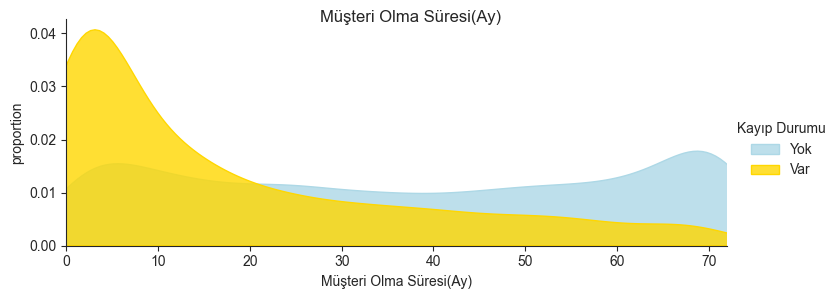

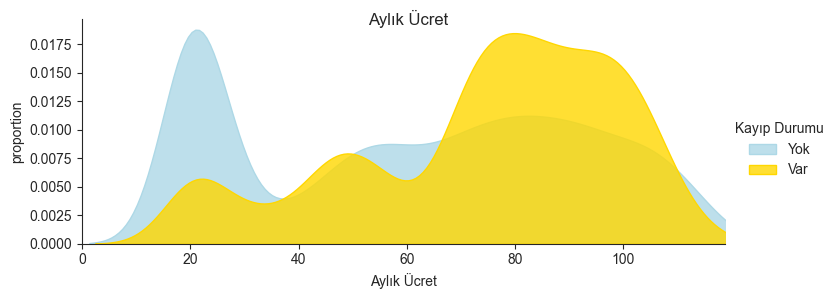

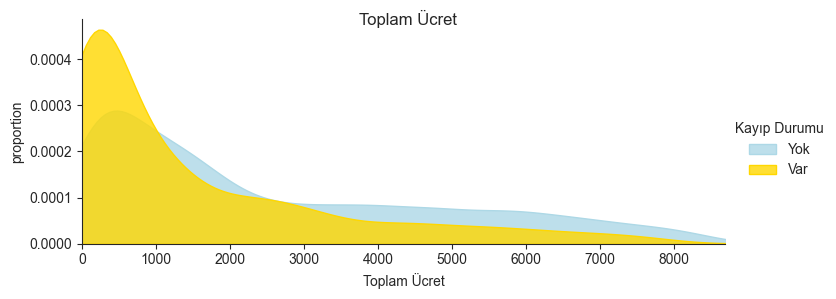

### Nümerik Değişkenlerin Dağılımı Grafiklerine Göre Doğrusal Bir Dağılım Göstermemektedir.

In [116]:
plot_distribution_num('Müşteri Olma Süresi(Ay)')
plot_distribution_num('Aylık Ücret')
plot_distribution_num('Toplam Ücret')
printmd("### Nümerik Değişkenlerin Dağılımı Grafiklerine Göre Doğrusal Bir Dağılım Göstermemektedir.")

# Normallik Hipotez Sınamaları
D'Agostino'nun K-kare sınaması
Anderson-Darling sınaması

# D'Agostino'nun K-kare sınaması

In [117]:
printmd("# Aylık Ücret")
stat, p = stats.normaltest(df['Aylık Ücret'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Aylık Ücret

Statistics=11419.52879, p=0.000
Sample does not look Gaussian (reject H0)


In [118]:
printmd("# Müşteri Olma Süresi(Ay)")
stat, p = stats.normaltest(df['Müşteri Olma Süresi(Ay)'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Müşteri Olma Süresi(Ay)

Statistics=76258.50517, p=0.000
Sample does not look Gaussian (reject H0)


In [119]:
printmd("# Toplam Ücret")
stat, p = stats.normaltest(df['Toplam Ücret'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# Toplam Ücret

Statistics=808.59515, p=0.000
Sample does not look Gaussian (reject H0)


# Anderson-Darling Sınaması

In [120]:
result = stats.anderson(df['Toplam Ücret'])
printmd("#Toplam Ücret")
print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

#Toplam Ücret

Statistic: 346.638
Significance level 15.00 % : critical value 0.576, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.656, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.787, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.917, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.091, data does not look normal (reject H0)


In [121]:
result = stats.anderson(df['Aylık Ücret'])
printmd("#Aylık Ücret")
print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

#Aylık Ücret

Statistic: 170.555
Significance level 15.00 % : critical value 0.576, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.656, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.787, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.917, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.091, data does not look normal (reject H0)


In [122]:
result = stats.anderson(df['Müşteri Olma Süresi(Ay)'])
printmd("#Müşteri Olma Süresi(Ay)")
print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

#Müşteri Olma Süresi(Ay)

Statistic: 203.235
Significance level 15.00 % : critical value 0.576, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.656, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.787, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.917, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.091, data does not look normal (reject H0)


# Pingouin Kullanarak Normallik Testi

In [123]:
normallik = pg.normality(df)
print("65 Yaş Üstü Değişkeni Dikkate Almamak Gerekiyor")
print(normallik)

65 Yaş Üstü Değişkeni Dikkate Almamak Gerekiyor
                                W  pval  normal
65 Yaş Üstü              0.443386   0.0   False
Müşteri Olma Süresi(Ay)  0.903751   0.0   False
Aylık Ücret              0.920889   0.0   False
Toplam Ücret             0.860152   0.0   False


In [124]:
df.head(3)

,Cinsiyet,65 Yaş Üstü,Medeni Durum,Bakma Sorumluluğu,Müşteri Olma Süresi(Ay),Ev Telefonu Aboneliği,Birden Fazla Abonelik Durumu,İnternet Aboneliği,Güvenlik Hizmeti Aboneliği,Yedekleme Hizmeti Aboneliği,...,Film Abonelği,Sözleşme Süresi,Online Fatura(Kağıtsız),Ödeme Şekli,Aylık Ücret,Toplam Ücret,Müşteri Olma Süresi(Ay)-binned,Aylık Ücret-binned,Toplam Ücret-binned,Kayıp Durumu
0,Kadın,0,Evli,Yok,1,Yok,Telefon Hizmeti Yok,DSL,Yok,Var,...,Yok,1 Aylık,Evet,Elektronik,29.85,29.85,Low,Low,Low,Yok
1,Erkek,0,Bekar,Yok,34,Var,Yok,DSL,Var,Yok,...,Yok,1 Yıllık,Hayır,Mail,56.95,1889.50,Medium,Medium,Low,Yok
2,Erkek,0,Bekar,Yok,2,Var,Yok,DSL,Var,Var,...,Yok,1 Aylık,Evet,Mail,53.85,108.15,Low,Medium,Low,Var


# Kayıp Durumu (Hedef Değişkenin) Dağılım Grafiği

In [125]:
pie_churn("Kayıp Durumu")
printmd("### Hedef Değişkeni Normal Dağılmamaktadır")

### Hedef Değişkeni Normal Dağılmamaktadır

In [126]:
make_subplots2("Güvenlik Hizmeti Aboneliği","Yedekleme Hizmeti Aboneliği","Ekipman Güvenlik Aboneliği","Teknik Destek Aboneliği")
printmd("### 'Yedekleme Hizmeti Aboneliği', 'Ekipman Güvenliği Aboneliği' , 'Tenik Destek Aboneliği' ve 'Güvenlik Hizmeti Aboneliği' aynı şekilde Normal Dağılmamaktadır.")

### 'Yedekleme Hizmeti Aboneliği', 'Ekipman Güvenliği Aboneliği' , 'Tenik Destek Aboneliği' ve 'Güvenlik Hizmeti Aboneliği' aynı şekilde Normal Dağılmamaktadır.

In [127]:
pie("Ödeme Şekli")

printmd("#### Ödeme Şekli Dağılımında Elektronik olarak ödeme çoğunluktadır.")

#### Ödeme Şekli Dağılımında Elektronik olarak ödeme çoğunluktadır.

In [128]:
make_subplots2("Cinsiyet","Bakma Sorumluluğu","65 Yaş Üstü","Sözleşme Süresi")

In [129]:
pie("Online Fatura(Kağıtsız)")
printmd("### Cinsiyet neredeyse Normal Dağılımlı gözüküyor")
printmd("### Diğer kalanlar ise Dormal Dağılmamış")

### Cinsiyet neredeyse Normal Dağılımlı gözüküyor

### Diğer kalanlar ise Dormal Dağılmamış

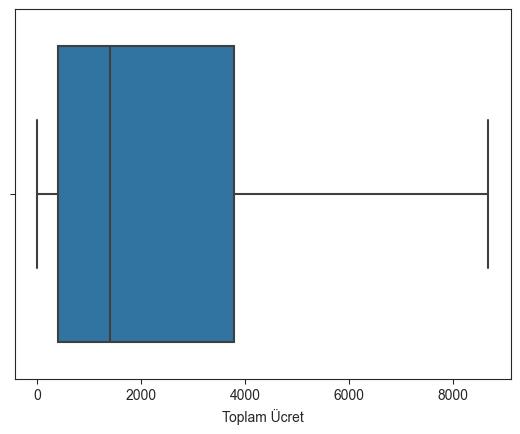

Toplam Ücret'in çoğunluğu 4000'in altında gözüküyor

In [130]:
box_plot("Toplam Ücret")
printmd("Toplam Ücret'in çoğunluğu 4000'in altında gözüküyor")

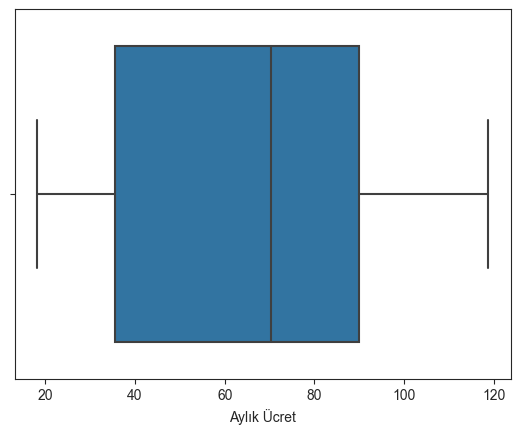

In [135]:
box_plot("Aylık Ücret")

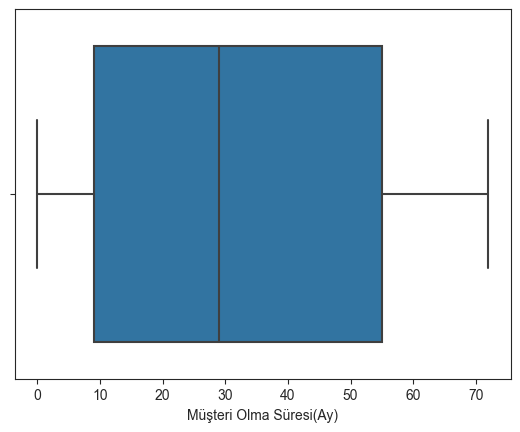

In [136]:
box_plot("Müşteri Olma Süresi(Ay)")

In [131]:
density(df["Müşteri Olma Süresi(Ay)"])
print("Mean:" ,df["Müşteri Olma Süresi(Ay)"].mean())
print("Median:",df["Müşteri Olma Süresi(Ay)"].median())
printmd("**Müşteri Olma Süresi U-shaped Dağılım Olabilir**")

Mean: 32.37114865824223
Median: 29.0


**Müşteri Olma Süresi U-shaped Dağılım Olabilir**

In [132]:
density(df["Aylık Ücret"])
printmd("**Aylık Ücret is heavily skewed**")

**Aylık Ücret is heavily skewed**

In [133]:
density(df["Toplam Ücret"])
printmd("**Toplam Ücret Ters J-Shaped Dağılımındadır**")

**Toplam Ücret Ters J-Shaped Dağılımındadır**

In [134]:
printmd("Cinsiyet Dışında normal dağılımlı kategorimizin olmadığını görüyoruz")

Cinsiyet Dışında normal dağılımlı kategorimizin olmadığını görüyoruz